### Part -A
• DOMAIN: Medical

• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.

• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

#### 1 Data Understanding
##### 1.A Read all the 3 CSV files as DataFrame and store them into 3 separate variables. 

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
type_h = pd.read_csv("Type_H.csv")
type_s = pd.read_csv("Type_S.csv")
type_normal = pd.read_csv("Normal.csv")

In [232]:
# Reading Type_H Dataset
type_h.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [233]:
# Reading Type_S Dataset
type_s.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [234]:
# Reading Type Normal Dataset
type_normal.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


##### 1.B Print 'Shape' and 'Columns' of each Dataframe

In [235]:
# Print shape of Type_H Dataset
type_h.shape

(60, 7)

Shape of Type_H Dataset is 60 rows * 7 columns

In [236]:
# Print Type_H Dataset Columns
type_h.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [237]:
# Print shape of Type_S Dataset
type_s.shape

(150, 7)

Shape of Type_S Dataset is 150 rows * 7 columns

In [238]:
# Print Type_S Dataset Columns
type_s.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [239]:
# Print Type_Normal Dataset Shape
type_normal.shape

(100, 7)

Shape of Type_Normal Dataset is 100 rows * 7 columns

In [240]:
# Print Type Normal Dataset Columns
type_normal.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

##### 1.C Compare Column names of all the 3 DataFrames and clearly write observations.

All the 3 datasets contain the identical number and types of Columns

##### 1.D Print DataTypes of all the 3 DataFrames. 

In [241]:
# Print Type_H Dataset datatypes
type_h.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [242]:
# Print Type_S Dataset datatypes
type_s.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [243]:
# Print Type_Normal Dataset datatypes
type_normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

###### 1.E Observe and share variation in ‘Class’ feature of all the 3 DataFrames

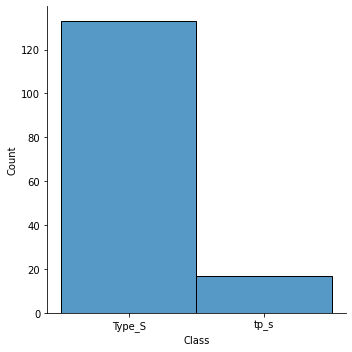

In [244]:
# Variation in Class column of Type_S Dataset
sns.displot(type_s.Class)

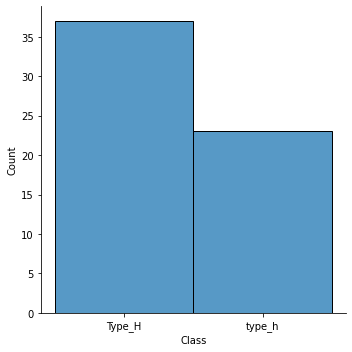

In [245]:
# Variation in Class column of Type_H Dataset
sns.displot(type_h.Class)

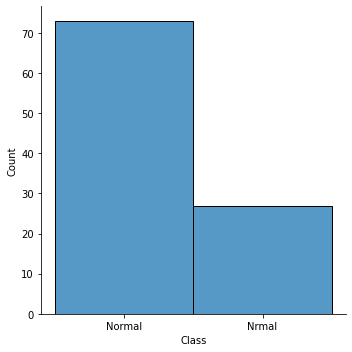

In [246]:
# Variation in Class column of Type_Normal Dataset
sns.displot(type_normal.Class)

#### 2. Data Preparation and Exploration

##### 2.1 Unify all the variations in ‘Class’ feature for all the 3 DataFrames.
##### 2.2. Combine all the 3 Dataframes

In [247]:
# Combine all 3 dataframes
df = type_h.append([type_s, type_normal])

In [248]:
df.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [249]:
df.shape

(310, 7)

In [250]:
df.loc[df['Class']=='tp_s', 'Class'] = 'Type_S'
df.loc[df['Class']=='type_h', 'Class'] = 'Type_H'
df.loc[df['Class']=='Nrmal', 'Class']= 'Normal'

In [251]:
df.Class.unique()

array(['Type_H', 'Type_S', 'Normal'], dtype=object)

##### 2.3 Print 5 random samples of this DataFrame

In [252]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
22,43.117951,13.815744,40.347388,29.302207,128.517722,0.970926,Normal
31,70.952728,20.159931,62.859109,50.792797,116.177932,32.522331,Type_S
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H
68,40.413366,-1.329412,30.982768,41.742778,119.335655,-6.173675,Normal
42,42.918041,-5.845994,58.000000,48.764035,121.606859,-3.362045,Normal


##### 2.4 Print Feature-wise percentage of Null values.

In [253]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [254]:
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

##### 2.5 Check 5-point summary of the new DataFrame.

In [255]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### 3 Data Analysis

##### 3.1 Visualize a heatmap to understand correlation between all features

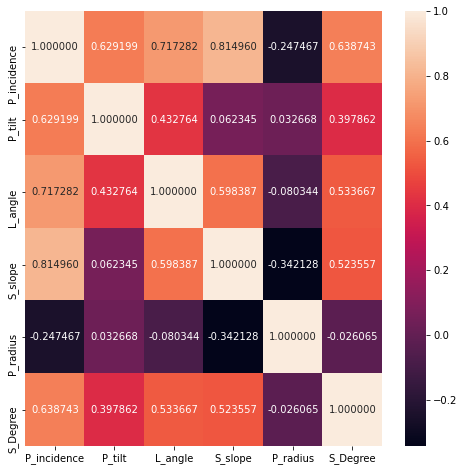

In [256]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='f')
plt.show()

#### 3.2 Share insights on correlation.

<b>It seems P_Incidence has a positive corelatio with all the features except P_radius</b>

<b>It seems P_radius has no or lower corelation to most other features</b>


##### 3.3 Visualize a pairplot with 3 classes distinguished by colors and share insights.

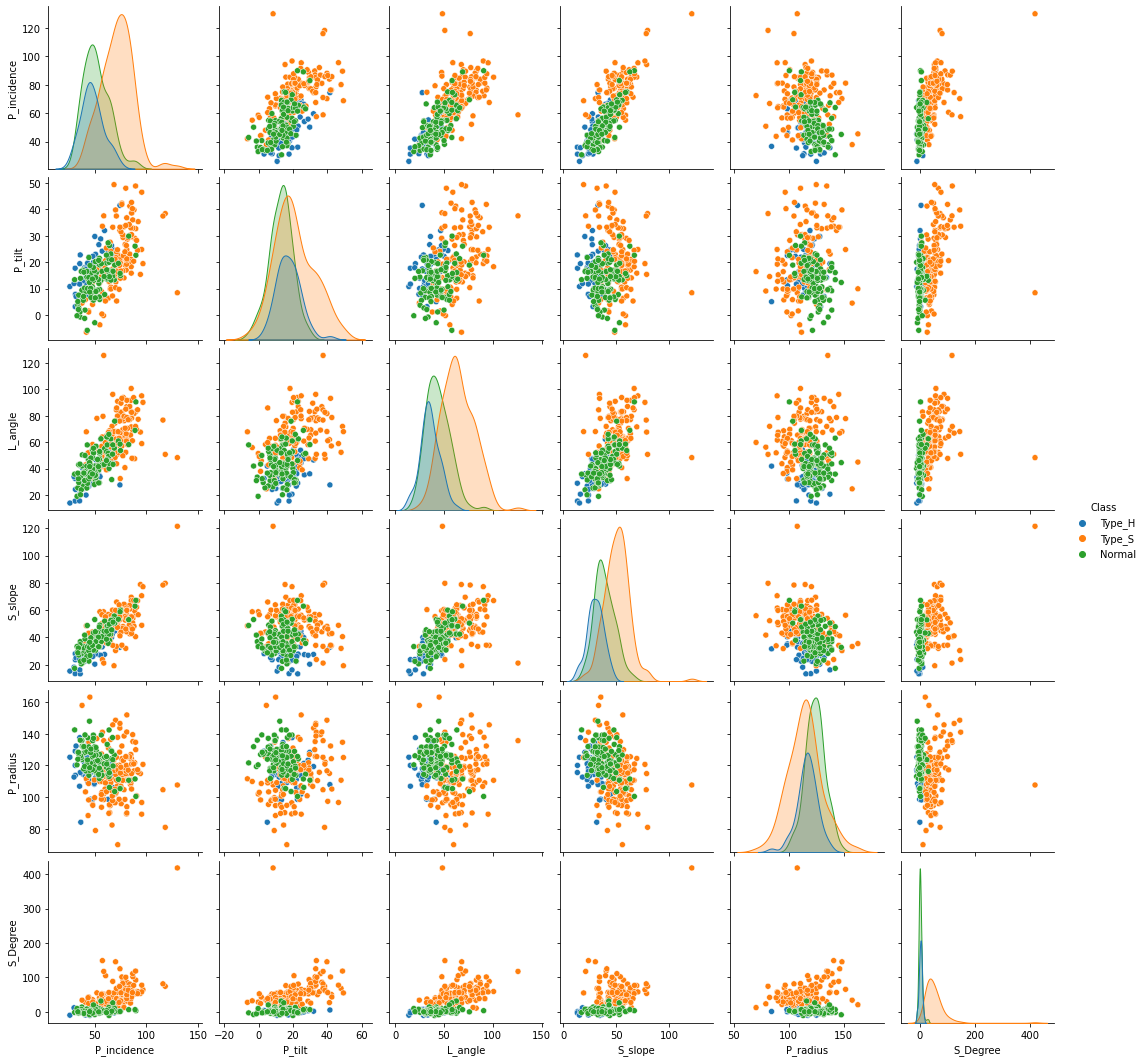

In [257]:
sns.pairplot(df, hue='Class')

<b>It seems that class 'type_s' class frequency is higher than other two classes</b>

<b>It seems that Normal class has higher values compared to other two classes</b>

##### 3.4 Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

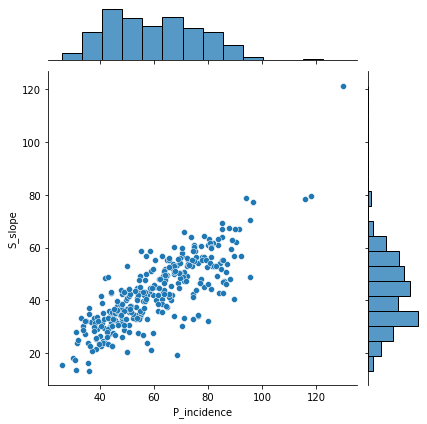

In [258]:
sns.jointplot(data=df, x='P_incidence', y='S_slope')

<b>It seems there is a positive corelation between both S_slope & P_incidence features</b>

<b>It seems S_slope values are left skewed</b>

<b>P_incidence values are right skewed</b>

##### 3.5 Visualize a boxplot to check distribution of the features and share insights

<AxesSubplot:ylabel='P_incidence'>

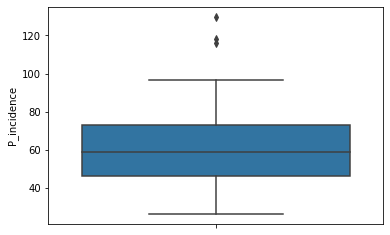

In [259]:
# P_Incidence Feature distribution
sns.boxplot(data=df, y="P_incidence")

<b>It seems the P_incidence feature is right skewed with lot of outliers </b>

<AxesSubplot:ylabel='S_Degree'>

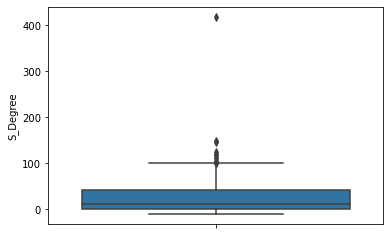

In [260]:
# S_Degree Feature Distribution
sns.boxplot(data=df, y="S_Degree")

<b>Even S_Degree is highly right skewed with outliers</b>

sns.boxplot(data=df, y='L_angle')

<AxesSubplot:xlabel='Class', ylabel='P_radius'>

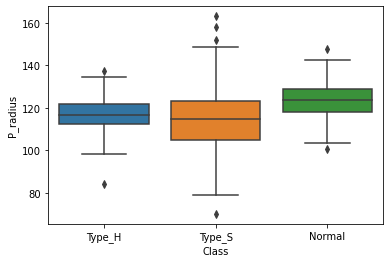

In [261]:
# P_radius vs Class
sns.boxplot(data=df, y='P_radius', x='Class')

#### 4. Model Building

##### 4.1 Split Data into X, Y

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [263]:
# Label Encode the Target Variable
labelEncoder = LabelEncoder()

df['Class']= labelEncoder.fit_transform(df['Class'])
df.Class.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

Type_S = 2, Normal = 0, Type_H = 1

In [264]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,1.161290
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.884852
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,2.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,2.000000


It seems we need to scale all the features

In [265]:
# Test Train Split

X = df.drop(['Class'], axis=1)
X.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [266]:
# Lets Apply Standardization to all the dependent Variables
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_scaled = standardScaler.fit_transform(X)

In [267]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [268]:
y = df['Class']
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int32

##### 4.2 Split Data into 80, 20 Ratio

In [269]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

##### 4.3 Train a Supervised Learning Classification base model using KNN classifier.

In [295]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, consensus_score, confusion_matrix
from sklearn.metrics import classification_report

In [290]:
# Model Building
KNN = KNeighborsClassifier(n_neighbors= 5 ,metric = 'minkowski' )

In [293]:
KNN.fit(X_train, y_train)
predicted_values = KNN.predict(X_test)

In [294]:
print('Training Accuracy', KNN.score(X_train, y_train))
print('Test Accuracy', KNN.score(X_test, y_test))

Training Accuracy 0.8346774193548387
Test Accuracy 0.8064516129032258


In [298]:
conf_metrix = confusion_matrix(y_test, predicted_values, labels=[0,1,2])

In [299]:
conf_metrix

array([[14,  2,  2],
       [ 2, 10,  0],
       [ 1,  5, 26]], dtype=int64)

In [302]:
conf_metrix_df = pd.DataFrame(conf_metrix, index=[i for i in ['Type_H', 'Normal', 'Type_S']], columns=[j for j in ['Type_H', 'Normal', 'Type_S']])
conf_metrix_df.head(5)

,Type_H,Normal,Type_S
Type_H,14,2,2
Normal,2,10,0
Type_S,1,5,26


<AxesSubplot:>

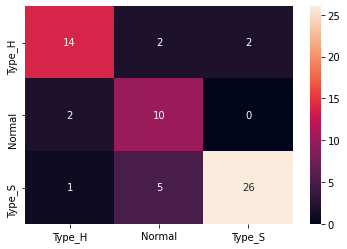

In [303]:
sns.heatmap(conf_metrix_df, annot=True)

##### 4.4 Print all the possible performance metrics for both train and test data

In [306]:
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.59      0.83      0.69        12
           2       0.93      0.81      0.87        32

    accuracy                           0.81        62
   macro avg       0.78      0.81      0.79        62
weighted avg       0.83      0.81      0.81        62



#### 5. Performance Improvements

##### 5.1 Experiment with various parameters to improve performance of the base model

In [307]:
# Lets check model performance for various values of K Neearest Neighbours

train_accuracies = []
test_accuracies = []

for i in range(2, 25):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    train_accuracies.append(KNN.score(X_train, y_train))
    test_accuracies.append(KNN.score(X_test, y_test))

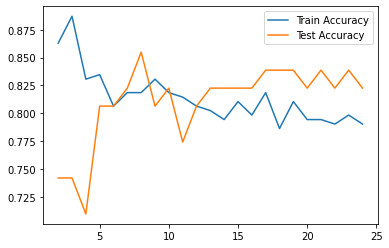

In [312]:
plt.plot(range(2, 25), train_accuracies, label='Train Accuracy')
plt.plot(range(2, 25), test_accuracies,  label='Test Accuracy')
plt.legend()
plt.show()

<b>It seems Training Accuracy decreases with increase in value of Nearest Neighbours</b>

<b>It seems KNN model performs best for around 8 value of Nearest Neighbours</b>

##### 5.3 Clearly showcase improvement in performance achieved.

In [322]:
# Lets check model performance for various values of K Neearest Neighbours

for i in [4,5,7,9,10,12,14,16]:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    print('Train Accuracy for K== {} is {}'.format(i, KNN.score(X_train, y_train)))
    print('Test Accuracy for k== {} is {}'.format(i, KNN.score(X_test, y_test)))
    print("Classification Report: \n", classification_report(y_test, y_pred))

Train Accuracy for K== 4 is 0.8306451612903226
Test Accuracy for k== 4 is 0.7096774193548387
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.38      0.42      0.40        12
           2       0.96      0.75      0.84        32

    accuracy                           0.71        62
   macro avg       0.66      0.67      0.65        62
weighted avg       0.75      0.71      0.72        62

Train Accuracy for K== 5 is 0.8346774193548387
Test Accuracy for k== 5 is 0.8064516129032258
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.59      0.83      0.69        12
           2       0.93      0.81      0.87        32

    accuracy                           0.81        62
   macro avg       0.78      0.81      0.79        62
weighted avg       0.83      0.81      0.81        62

Tr

<b>It seems the Accuracy, Recall and Precision values peeks out at around k==7 </b>

##### 5.4 Clearly state which parameters contributed most to improve model performance

<b>There are only two possible HyperParameters for KNN Model, i.e Neighbour Count and Distance Metrics</b>

<b>Model performs best for Neighbour count of 7</b>